## **기계학습을 위한 데이터 전처리**

1. 데이터 정제 및 분리하기 - 결측값&이상치 처리하기
2. 텍스트 데이터 숫자 데이터로 변환하기
3. 숫자 데이터를 정규화, 표준화시키기


## **Step 0 : 파일 다운로드하기**
- 아래 셀을 실행시켜 프로젝트에 사용할 데이터 파일을 colab 작업환경으로 다운로드한다.

In [48]:
# 구글 Colab에서 공유된 파일 다운로드해서 가져오기 - 타이타닉데이터
!gdown 1MXPXwJujTCKuq8vWHZk0p_taefm4hhg9

Downloading...
From: https://drive.google.com/uc?id=1MXPXwJujTCKuq8vWHZk0p_taefm4hhg9
To: c:\Users\STC\Desktop\03_데이터처리패키지및분석\titanic.csv

  0%|          | 0.00/61.2k [00:00<?, ?B/s]
100%|██████████| 61.2k/61.2k [00:00<00:00, 1.67MB/s]


## **Step 1 : 라이브러리 가져오기**
- pandas 패키를 가져와 pd로 사용한다
- numpy 패키지를 가져와 np로 사용한다

In [49]:
import pandas as pd
import numpy as np

## **Step 2 : 데이터 읽기 및 정보 파악하기**


#### 1) 파일 읽어 저장 후 상위5개 데이터 출력하기

In [50]:
# 1. 판다스 read_csv()를 사용하여'titanic.csv' 데이터를 읽어옵니다.

df = pd.read_csv('titanic.csv')
df.head()     # df.iloc[0:5,:] - iloc를 사용 :df.head()와 실행결과 동일

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**데이터 설명 :**

|번호  |데이터명       |내용              |
|------|---------------|------------------|
| 0    | PassengerId | 승객번호 |
| 1    | Survived	   | 생존 여부 ( 1 : 생존, 0 : 아닌 경우 )
| 2    | Pclass	     | 승객 등급
| 3    | Name	       | 승객 이름
| 4    | Gender        | 승객 성별
| 5    | Age         | 승객 나이
| 6    | SibSp       | 동승한 형제 또는 배우자 수
| 7    | Parch       | 동승한 부모 또는 자녀 수
| 8    | Ticket	     | 티켓 번호
| 9    | Fare        | 승객 지불 요금
| 10   | Cabin	     | 선실 이름
| 11   | Embarked    | 승선한 항구 ( C : Cherbourg, Q : Queenstown, S : Southampton )

#### 2) 데이터 정보 파악하기

In [51]:
# 읽어온 데이터 정보 파악하기
df.info()

# object : 문자(추후 처리 필요)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## step3 : 데이터 전처리하기

## 1.데이터 정제 및 분리하기 - 결측값&이상치 처리하기

### 1) 결측치 처리하기

In [52]:
# 결측치 파악하여 갯수 구해보기 - isnull(), sum()사용
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# 데이터 변경을 고려하여 df 를 df_1에 복사하기
df_1 = df.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
# 결측치가 너무 많은  Cabin 변수를 제거합니다.- drop() 사용
df_1 = df_1.drop(columns=['Cabin'])
# df_1 = df_1.drop(['Cabin'], axis=1)   # 위 줄과 같은 동작

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [55]:
# 결측치 다시 한 번 확인하기
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [56]:
df_1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [57]:
# 가장 빈도가 높은 값으로 채우기 
df_1['Embarked'].fillna(df_1['Embarked'].mode()[0], inplace=True)

In [58]:
# 결측값이 존재하는 샘플 제거하고 null이 있는지 확인하고 그 합계 구하기 -isnull(),sum()

df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [60]:
df_1['Age'] = df_1['Age'].dropna()


In [61]:
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### 2)이상치 확인하기

In [62]:
# 'Age' 이상치 확인
df_1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [63]:
# (Age 값 - 내림 Age 값) 0 보다 크다면 소수점을 갖는 데이터로 분류합니다.
outlier = df_1[df_1['Age']-np.floor(df_1['Age']) > 0 ]['Age']

print('소수점을 갖는 Age 변수 이상치')
print(outlier)
print('이상치 처리 전 샘플 개수: %d' %(len(df_1)))
print('이상치 개수: %d' %(len(outlier)))

# 이상치를 처리합니다.
df_2 = df_1[df_1['Age']-np.floor(df_1['Age']) == 0 ]
print('이상치 처리 후 샘플 개수: %d' %(len(df_2)))
df_2 = np.floor(df_2['Age'])
df_2.head()

소수점을 갖는 Age 변수 이상치
57     28.50
78      0.83
111    14.50
116    70.50
122    32.50
123    32.50
148    36.50
152    55.50
153    40.50
203    45.50
227    20.50
296    23.50
305     0.92
331    45.50
469     0.75
525    40.50
644     0.75
676    24.50
735    28.50
755     0.67
767    30.50
803     0.42
814    30.50
831     0.83
843    34.50
Name: Age, dtype: float64
이상치 처리 전 샘플 개수: 891
이상치 개수: 25
이상치 처리 후 샘플 개수: 689


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

<Axes: >

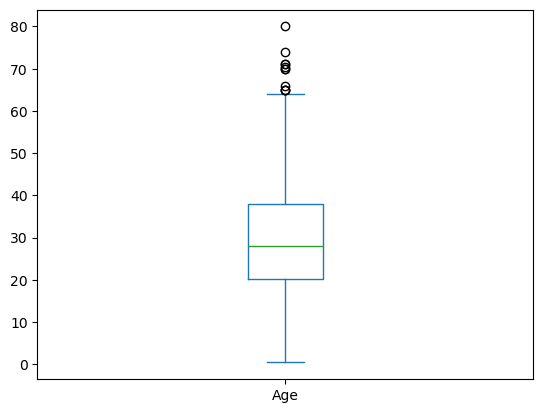

In [64]:
df_1['Age'].plot.box()

In [65]:
#*IQR(Interquartile Range)을 사용하여 이상치를 제거
# Q1 = df_2['Age'].quantile(0.25)
# Q3 = df_2['Age'].quantile(0.75)
# IQR = Q3 - Q1
# df_3 = df_2[(df_2['Age'] >= Q1 - 1.5 * IQR) & (df_2['Age'] <= Q3 + 1.5 * IQR)]

## 2.텍스트 데이터 숫자 데이터로 변환하기

### 1) replace() 사용하여 데이터 값을 바꾸기

In [66]:
# 'Sex' 컬럼 상위 5개 불러오고 컬럼 카테고리 파악하기
print('변환 전: \n',df['Sex'].head())
df['Sex'].value_counts()

변환 전: 
 0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


Sex
male      577
female    314
Name: count, dtype: int64

In [72]:
# replace()를 사용하여 male -> 1, female -> 0로 변환합니다.
df_1 = df_1.replace({'Sex': {'male':1, 'female':0}})

# 변환한 성별 데이터를 출력합니다.
print('\n변환 후: \n',df['Sex'].head())


변환 후: 
 0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


### 2) get_dummies() 사용하여 원핫인코딩하기

In [68]:
# 'Embarked' 컬럼 상위 5개 불러오고 컬럼 카테고리 파악하기
print('변환 전: \n',df['Embarked'].head())
df['Embarked'].value_counts()

변환 전: 
 0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# get_dummies()를 사용하여  'Embarked' 컬럼 변환합니다.
dummies = pd.get_dummies(data=df_1, columns=['Embarked'], dtype='int')
# df.replace({"Embarked" : {'S':1, 'C':2, 'Q':3}}, inplace=True)  # Embarked 변환

# 변환한 Embarked 데이터를 출력합니다.
print('\n변환 후: \n',dummies.head())


변환 후: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           0           0           1  
1          PC 17599  71.2833           1           0           0  
2  STON/O2. 3101282   7.9250           0           0           1  
3            113803

## 3.숫자 데이터를 정규화, 표준화시키기
데이터의 컬럼 별 단위 또는 범위를 통일시켜주기 위해서임.
컬럼별로 뭐 시간, km, kg 등 다양한 단위를 가지는데 이러면 직접적인 비교가 불가능하다.  

머신러닝에 사용되는 데이터는 그 값이 너무 크거나 작지 않고 적당한 범위 (-1에서 ~ 1사이)에 있어야 모델의 정확도가 높아진다고 알려져있다

머신러닝에서 정규화 또는 표준화 중 무엇을 해야하는지는 2개를 비교해보고 결정해야한다.

어느 모델에선 정규화를 한 데이터가 값이 더 높을 수도 있고 표준화를 한 데이터가 값이 더 높을 수가 있기 때문에  둘 다 비교해 보는 것을 추천한다.

### 1) 정규화(Normalization)

- 데이터를 특정 구간으로 바꾸는 척도법이다. 즉 값의 범위를 0~1사이로 옮겨준다.  (ex. 0~1 or 0~100).
- 식 : (측정값 - 최소값) / (최대값 - 최소값)
- 모든 데이터의 단위가 모두 0~1사이로 옮겨지게 해주는 것이다.
- 이러면 데이터의 컬럼들이 평등하게 0~1사이로 놓여지기 때문에 기계가 학습하기에 어느 컬럼에 중점을 두고 학습하기보단 평등하게 컬럼들을 보고 학습시킨다.

In [ ]:
# 1) 정규화를 수행하는 함수를 구현합니다.
def normal(data):
    data =(data- data.min()) / (data.max()- data.min())
    return data

print('변환 전: \n',df['Fare'].head())

# normal 함수를 사용하여 정규화합니다.
Fare = normal(df['Fare'])

# 변환한 Fare 데이터를 출력합니다.
print('\n변환 후: \n',Fare.head())

변환 전: 
 0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

변환 후: 
 0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
Name: Fare, dtype: float64


### 2)표준화(Standardization)

- 데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법이다. 표준화를 하게 되면 각 데이터들은 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환된다.
- 식 (Z-score 표준화) : (측정값 - 평균) / 표준편차
- 변환된 데이터는 다소 평평하게 만드는 특성을 가진다 (진폭의 감소). 진폭의 감소로 각 데이터의 간격이 감소하게 된다 (ex. 10000의 단위에서 0.1 단위로 감소).

- 표준화는 먼저 데이터가 정규분포를 따른다는 가정하에 실시된다.(정규분포는 종모양 분포임)

- 정규분포를 따른다는 가정하에 데이터를 평균은 0, 표준편차는 1이 되도록 만들어준다. 그렇기에 변한 값이 0~1사이로 바뀌지는 않는다. 하지만 평균은 0이니깐 0의 근처로 많이 잡힐 것이다.

In [75]:
# 2) 표준화를 수행하는 함수를 구현합니다.
def standard(data):
    data = (data - data.mean()) / data.std()
    return data

print('변환 전: \n',df['Fare'].head())

# standard 함수를 사용하여 표준화합니다.
Fare = standard(df['Fare'])

# 변환한 Fare 데이터를 출력합니다.
print('\n변환 후: \n',Fare.head())

변환 전: 
 0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

변환 후: 
 0   -0.502163
1    0.786404
2   -0.488580
3    0.420494
4   -0.486064
Name: Fare, dtype: float64


In [77]:
# sklearn 라이브러리를 사용한 표준화 적용
from sklearn.preprocessing import StandardScaler

def standard(column):
    scaler = StandardScaler()
    return scaler.fit_transform(column.values.reshape(-1, 1)).flatten()

## 통합 코드

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
df = pd.read_csv('titanic.csv')

# 2. 불필요한 열 제거
df_1 = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

# 3. 결측값 처리
df_1['Embarked'] = df_1['Embarked'].fillna(df_1['Embarked'].mode()[0])
df_2 = df_1.dropna()

# 4. 이상치 처리 (IQR 사용)
Q1 = df_2['Age'].quantile(0.25)
Q3 = df_2['Age'].quantile(0.75)
IQR = Q3 - Q1
df_3 = df_2[(df_2['Age'] >= Q1 - 1.5 * IQR) & (df_2['Age'] <= Q3 + 1.5 * IQR)]

# 5. 텍스트 데이터를 숫자로 변환 (원핫 인코딩 사용)
df_4 = pd.get_dummies(df_3, columns=['Sex', 'Embarked'], drop_first=True, dtype='int')

# 6. 데이터 정규화
scaler = StandardScaler()
df_4['Fare'] = scaler.fit_transform(df_4[['Fare']])
df_4['Age'] = scaler.fit_transform(df_4[['Age']])

# 최종 데이터 확인
df_4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.515506,1,0,-0.517406,1,0,1
1,1,1,0.650784,1,0,0.685830,0,0,0
2,1,3,-0.223933,0,0,-0.504723,0,0,1
3,1,1,0.432105,1,0,0.344152,0,0,1
4,0,3,0.432105,0,0,-0.502374,1,0,1


## 전처리된 파일 내보내기

In [79]:
# index=False 주어야 기존 인덱스 값이 저장되지 않음
df_4.to_csv('./titanic_save.csv', index=False)


## **기계학습 구현 준비**
1. 특성 및 타겟 항목 지정
2. 학습용/테스트용 데이터셋 분리하기


In [80]:
# 2. feature 데이터와 label 데이터를 분리하기

X = df_4.drop(columns=['Survived'])
y = df_4['Survived']
print(f'X 데이터 Shape: {X.shape}')
print(f'y 데이터 Shape: {y.shape}')

X 데이터 Shape: (703, 8)
y 데이터 Shape: (703,)


In [81]:
# 3. 학습용, 평가용 데이터셋으로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 분리한 데이터의 개수를 출력합니다.
print('학습용 데이터 개수: %d' %(len(X_train)))
print('평가용 데이터 개수: %d' %(len(X_test)))

학습용 데이터 개수: 492
평가용 데이터 개수: 211
